# COMP2200/COMP6200 Prac - Week 4

_Author: Benjamin Pope (benjamin.pope@mq.edu.au)_

---

In lectures this week we learned about fitting models to data - linear and logistic regression. In this practical we will use `scikit-learn` to model higher-dimensional data, including polynomial regression for the fish market dataset, with ridge and lasso regression. We will also look at logistic regression for the Titanic dataset.

**Please submit the completed notebook for this workshop to your GitHub Classroom for marking!**

Remember that to use a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell;  if you look around the user interface, various other menu items can run several cells in sequence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model, preprocessing, metrics, model_selection
from glob import glob

---

There is a great dataset on Kaggle, which we looked at in part on Monday's lecture: the 'fish market dataset' containing dimensions and weight of fish. This is a good opportunity to [set up a Kaggle API key](https://www.kaggle.com/docs/api) if you haven't already, so that you can automatically download the dataset. 

In [2]:
# Load the Fish Market dataset from Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\willi\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


Always make a quick visualization of your data! In the code below, we are restricting ourselves to just a single species; modify this code to include all species.

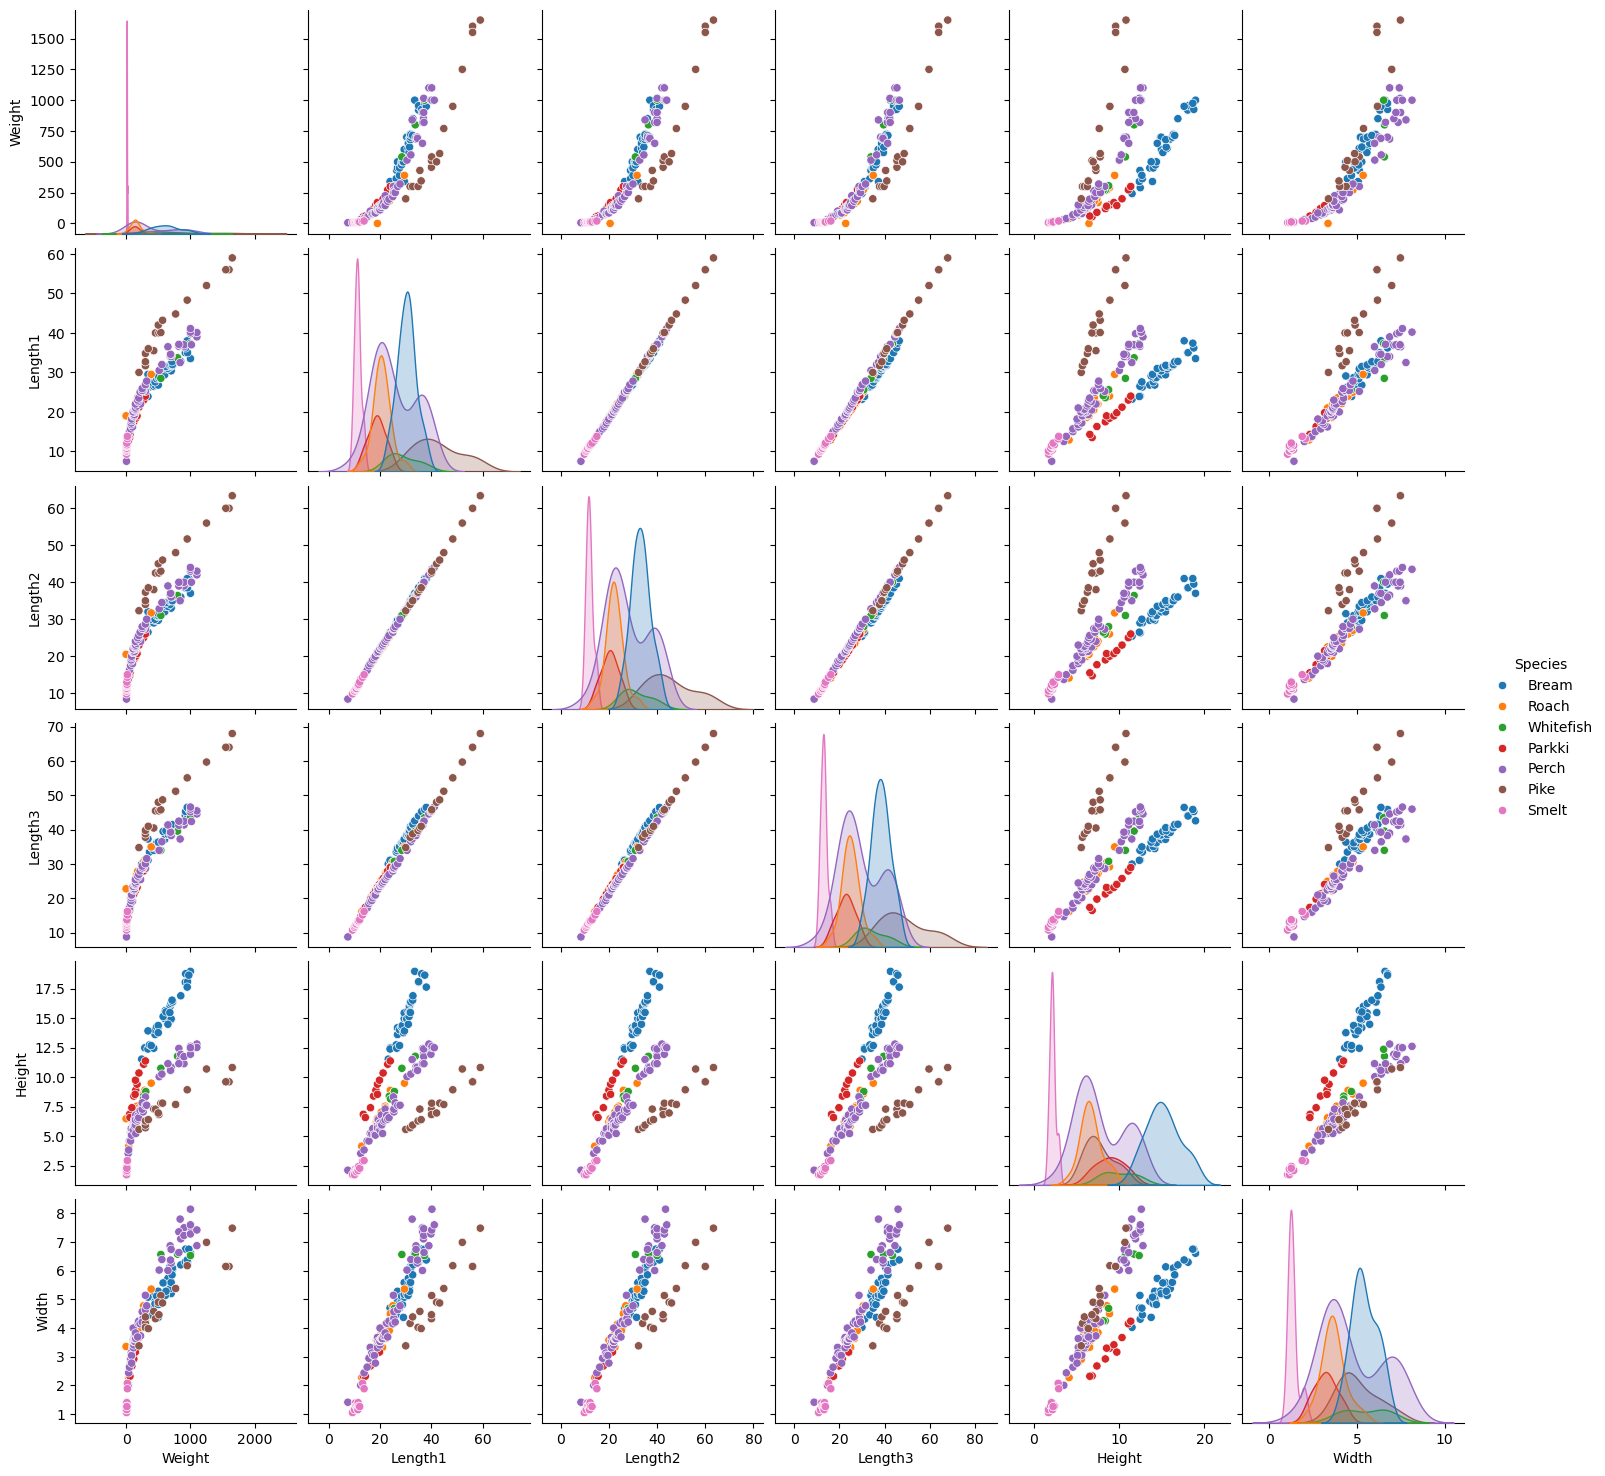

In [3]:
# Plot this
fname = glob(path + "/*.csv")[0]
df = pd.read_csv(fname)
pair = sns.pairplot(df,hue="Species",kind='scatter')

First you want to preprocess the data to be normalized. 

(Advanced: skip this step and see what happens to the results of the regression models! We expect polynomial models to become unstable.)

In [4]:
scaler = preprocessing.MinMaxScaler()
params = ['Weight','Length1','Length2','Length3','Height','Width']

scaler.fit(df[params])
df[params] = scaler.transform(df[params])

First, in the cell below, create test and training sets, using `sklearn.model_selection.train_test_split`. A good split is 80% training and 20% testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 35
Test set size: 9


Let us begin by doing some linear regression between the linear dimensions of the fish, just to play around with some things that really are pretty linear. 

In the cell below, use `sklearn.linear_model.LinearRegression` to fit a linear model to the fish market data, showing examples for:
- Width vs. Length1, Length2, Length3
- Height vs. Length1, Length2, Length3
- Width vs. Height
- Width vs both Length1 *and* Height - doing multilinear regression

For each of these, print the coefficients and the

- R-squared, 
- RMSE, and 
- MAE  

values for the training and testing data. Which performed the best on training? Which performed the best on test?

*Always* overplot the predictions on the data, and make sure to label the axes and the plot.

Answer: The R squared training data was best for training as the value was closer to 1. 


Model coefficients for Width vs Length1, Length2, Length3: [ 0.22394344 -1.21642196  2.54630361]
R-squared (Train): 0.9449454338067148
R-squared (Test): 0.9661486430186743
RMSE (Train): 0.05651536967675131
RMSE (Test): 0.04953855483765559
MAE (Train): 0.04105909237902118
MAE (Test): 0.04037055324221562


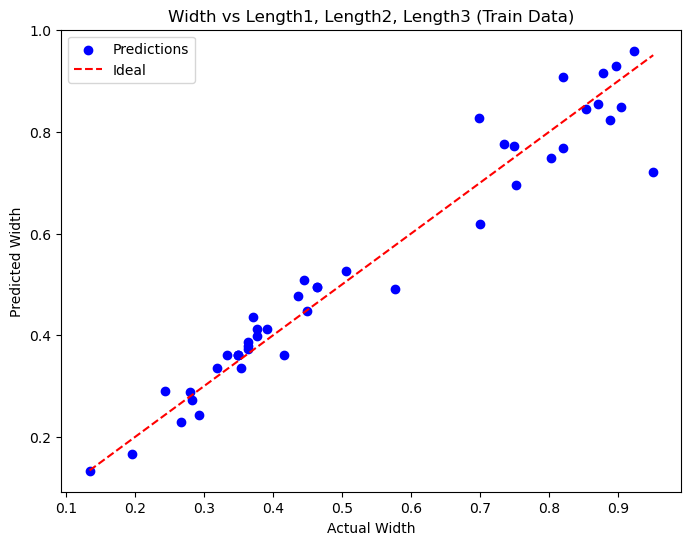

Model coefficients for Height vs Length1, Length2, Length3: [ 0.02468813 -0.05545763  1.08637791]
R-squared (Train) for Height model: 0.9707707028423693
R-squared (Test) for Height model: 0.9700467994405672
RMSE (Train) for Height model: 0.027865201813618547
RMSE (Test) for Height model: 0.029276567828884253
MAE (Train) for Height model: 0.022007652256660862
MAE (Test) for Height model: 0.025882944315476636


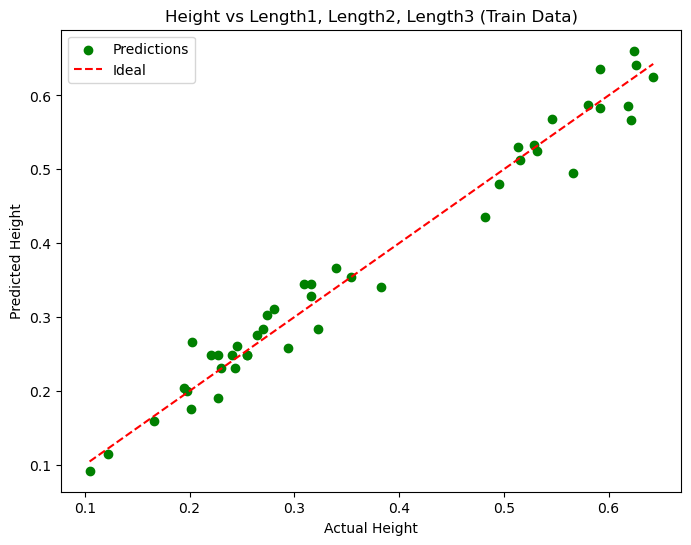

In [7]:
df_perch = df[df.Species == 'Perch']

X1_train = train[['Length1', 'Length2', 'Length3']]  
X1_test = test[['Length1', 'Length2', 'Length3']]  
y1_train = train['Width']  
y1_test = test['Width'] 


model = linear_model.LinearRegression()
X1_train = train[['Length1', 'Length2', 'Length3']]  
X1_test = test[['Length1', 'Length2', 'Length3']]  
y1_train = train['Width']  
y1_test = test['Width'] 
model.fit(X1_train, y1_train)
print("Model coefficients for Width vs Length1, Length2, Length3:", model.coef_)

y1_train_pred = model.predict(X1_train)
y1_test_pred = model.predict(X1_test)

r2_train = metrics.r2_score(y1_train, y1_train_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y1_train, y1_train_pred))
mae_train = metrics.mean_absolute_error(y1_train, y1_train_pred)

r2_test = metrics.r2_score(y1_test, y1_test_pred)
rmse_test = np.sqrt(metrics.mean_squared_error(y1_test, y1_test_pred))
mae_test = metrics.mean_absolute_error(y1_test, y1_test_pred)

print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)
print("MAE (Train):", mae_train)
print("MAE (Test):", mae_test)

plt.figure(figsize=(8, 6))
plt.scatter(y1_train, y1_train_pred, color='blue', label='Predictions')
plt.plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Width')
plt.ylabel('Predicted Width')
plt.title('Width vs Length1, Length2, Length3 (Train Data)')
plt.legend()
plt.show()

X2_train = train[['Length1', 'Length2', 'Length3']]
X2_test = test[['Length1', 'Length2', 'Length3']]
y2_train = train['Height']
y2_test = test['Height']

model.fit(X2_train, y2_train)

print("Model coefficients for Height vs Length1, Length2, Length3:", model.coef_)

y2_train_pred = model.predict(X2_train)
y2_test_pred = model.predict(X2_test)

r2_train = metrics.r2_score(y2_train, y2_train_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))
mae_train = metrics.mean_absolute_error(y2_train, y2_train_pred)

r2_test = metrics.r2_score(y2_test, y2_test_pred)
rmse_test = np.sqrt(metrics.mean_squared_error(y2_test, y2_test_pred))
mae_test = metrics.mean_absolute_error(y2_test, y2_test_pred)

print("R-squared (Train) for Height model:", r2_train)
print("R-squared (Test) for Height model:", r2_test)
print("RMSE (Train) for Height model:", rmse_train)
print("RMSE (Test) for Height model:", rmse_test)
print("MAE (Train) for Height model:", mae_train)
print("MAE (Test) for Height model:", mae_test)

plt.figure(figsize=(8, 6))
plt.scatter(y2_train, y2_train_pred, color='green', label='Predictions')
plt.plot([min(y2_train), max(y2_train)], [min(y2_train), max(y2_train)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Height vs Length1, Length2, Length3 (Train Data)')
plt.legend()
plt.show()




Advanced: use the design matrix from above to calculate the uncertainty in the coefficients, models from a multivariate normal distribution, and illustrate the uncertainty in the model.

In [ ]:
residuals = model.predict(X) - train['Weight']
uncertainty = ...


Now we want to do something more advanced: as we know, the weight of something scales with the volume, which is not linear at all! We should do a *polynomial* regression.

Model coefficients: [ 0.00000000e+00 -1.75577017e+00 -4.47702462e-01  2.50285493e+00
  7.46240113e+00 -4.00662076e+00  1.90409989e+00  1.07019223e+01
 -2.28961508e+01  7.79135036e+00  2.54247807e+02  1.20575335e+02
 -9.72752419e+02 -1.99715066e+02  3.43998466e+02  7.41729150e+02
 -2.52480069e+01  2.80673073e+02 -5.45396127e+02  2.10707648e+00]
R-squared: 0.9949275085801966
RMSE: 0.01485926189293954
MAE: 0.009806020728825124


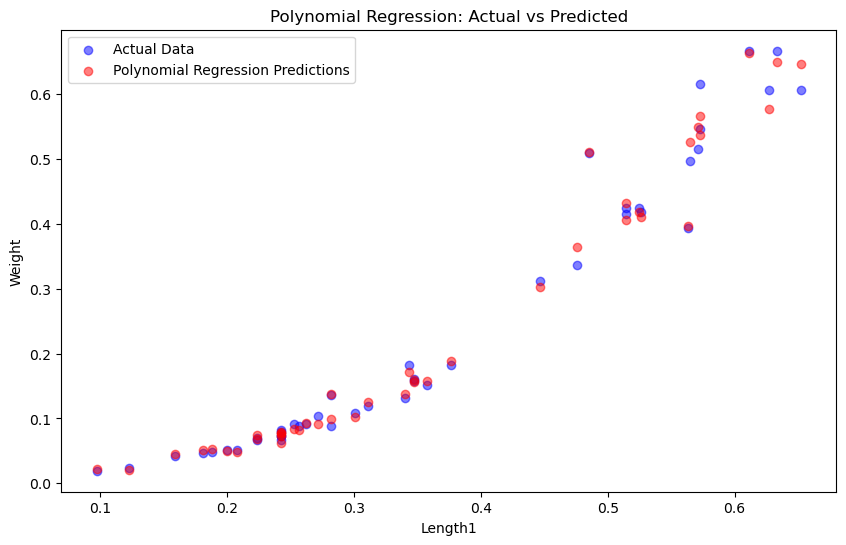

In [8]:
poly = preprocessing.PolynomialFeatures(degree=3)

poly_features = poly.fit_transform(X)
model.fit(poly_features, train['Weight'])
print("Model coefficients:", model.coef_)

y_pred = model.predict(poly_features)
r2 = metrics.r2_score(train['Weight'], y_pred)
rmse = np.sqrt(metrics.mean_squared_error(train['Weight'], y_pred))
mae = metrics.mean_absolute_error(train['Weight'], y_pred)
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
plt.figure(figsize=(10, 6))
plt.scatter(train['Length1'], train['Weight'], color='blue', label='Actual Data', alpha=0.5)
plt.scatter(train['Length1'], y_pred, color='red', label='Polynomial Regression Predictions', alpha=0.5)
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

(array([1., 0., 0., 0., 1., 0., 1., 1., 3., 7., 9., 9., 6., 1., 1., 0., 0.,
        2., 1., 1.]),
 array([-4.90002489e-02, -4.45511985e-02, -4.01021480e-02, -3.56530976e-02,
        -3.12040471e-02, -2.67549967e-02, -2.23059462e-02, -1.78568958e-02,
        -1.34078453e-02, -8.95879486e-03, -4.50974441e-03, -6.06939580e-05,
         4.38835649e-03,  8.83740695e-03,  1.32864574e-02,  1.77355078e-02,
         2.21845583e-02,  2.66336088e-02,  3.10826592e-02,  3.55317097e-02,
         3.99807601e-02]),
 <BarContainer object of 20 artists>)

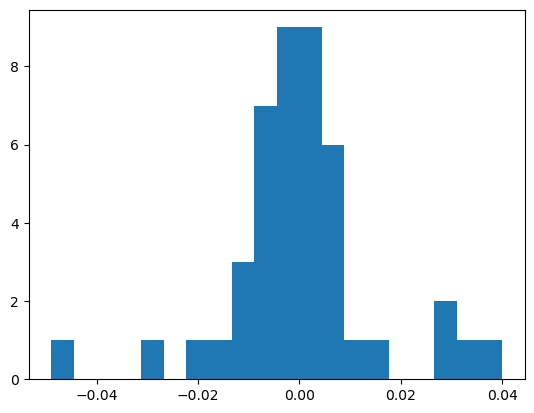

In [9]:
residuals = model.predict(poly_features) - train['Weight']
plt.hist(residuals, bins=20)

There is an efficient way to automate taking multiple steps: `sklearn.pipeline.Pipeline`. 

We use it like this:

   Polynomial Degree       Test R2  Test MAE   Test RMSE
0                  1  8.406445e-01  0.050432    0.091245
1                  2  9.041003e-01  0.025005    0.070784
2                  3  7.814930e-01  0.040102    0.106846
3                  4  6.741928e-01  0.025397    0.130469
4                  5  7.193515e-01  0.028956    0.121090
5                  6 -1.713397e+02  0.131578    3.000672
6                  7 -7.490155e+02  0.188503    6.259807
7                  8 -5.262005e+04  0.723409   52.433110
8                  9 -1.209676e+07  1.123506  794.987602


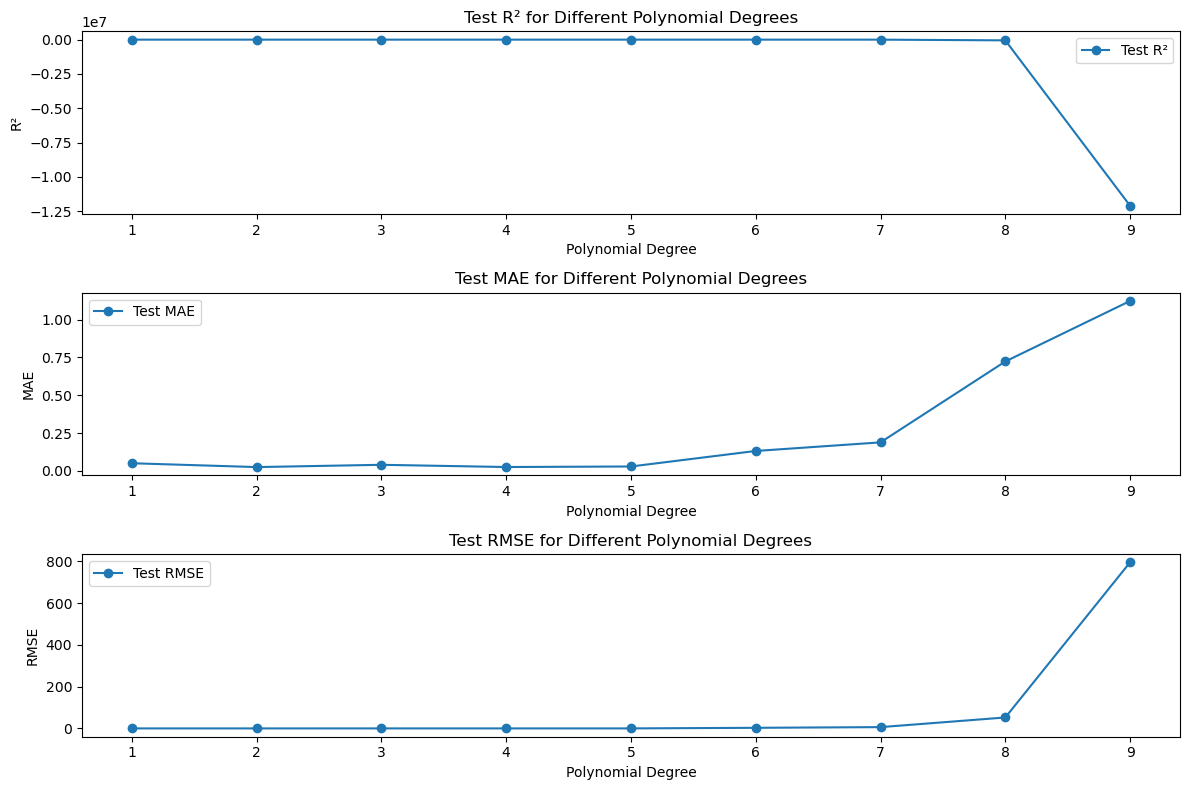

In [23]:
X = df[['Length1', 'Length2', 'Length3']]  
y = df['Weight']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


r2s = []
maes = []
rmses = []

max_order = 10  

for polyfeatures in range(1, max_order):
    steps = [
        ("scalar", preprocessing.StandardScaler()), 
        ("poly", preprocessing.PolynomialFeatures(degree=polyfeatures)),  
        ("model", linear_model.LinearRegression())  
    ]

   
    pipe = Pipeline(steps)

    pipe.fit(X_train, y_train)

    y_pred_test = pipe.predict(X_test)
    
    r2 = metrics.r2_score(y_test, y_pred_test)  
    mae = metrics.median_absolute_error(y_test, y_pred_test)  
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  

    r2s.append(r2)
    maes.append(mae)
    rmses.append(rmse)

metrics_df = pd.DataFrame({
    'Polynomial Degree': range(1, max_order),
    'Test R2': r2s,
    'Test MAE': maes,
    'Test RMSE': rmses
})


print(metrics_df)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test R2'], label='Test R²', marker='o')
plt.title('Test R² for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test MAE'], label='Test MAE', marker='o')
plt.title('Test MAE for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test RMSE'], label='Test RMSE', marker='o')
plt.title('Test RMSE for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

Using this framework, explore what polynomial order fits the data best, and generate the summary statistics for the training *and* testing data.

Which polynomial order fits the data best? Do you notice any overfitting - where the training data fits very well, but the testing data does not?

   Polynomial Degree  Train R2       Test R2  Train MAE  Test MAE  Train RMSE  \
0                  1  0.855012  8.406445e-01   0.047712  0.050432    0.080911   
1                  2  0.909777  9.041003e-01   0.024076  0.025005    0.063826   
2                  3  0.929468  7.814930e-01   0.021063  0.040102    0.056433   
3                  4  0.952303  6.741928e-01   0.014880  0.025397    0.046407   
4                  5  0.966662  7.193515e-01   0.014540  0.028956    0.038798   
5                  6  0.987438 -1.713397e+02   0.009752  0.131578    0.023816   
6                  7  0.995056 -7.490155e+02   0.002521  0.188503    0.014941   
7                  8  0.996015 -5.262005e+04   0.000661  0.723409    0.013414   
8                  9  0.996738 -1.209676e+07   0.000511  1.123506    0.012136   

    Test RMSE  
0    0.091245  
1    0.070784  
2    0.106846  
3    0.130469  
4    0.121090  
5    3.000672  
6    6.259807  
7   52.433110  
8  794.987602  


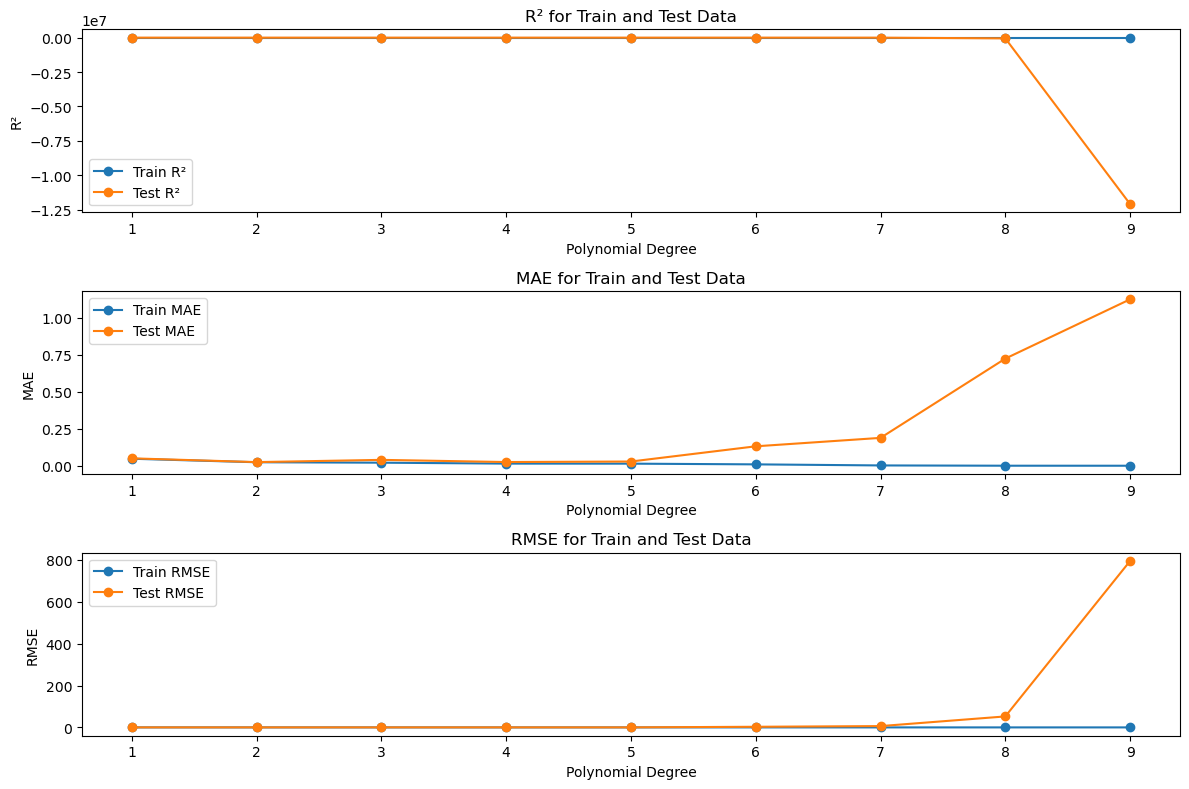

In [24]:
X = df[['Length1', 'Length2', 'Length3']] 
y = df['Weight'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r2s = []
maes = []
rmses = []

max_order = 10

for polyfeatures in range(1, max_order):
    
    steps = [
        ("scalar", preprocessing.StandardScaler()), 
        ("poly", preprocessing.PolynomialFeatures(degree=polyfeatures)),  
        ("model", linear_model.LinearRegression()) 
    ]

    pipe = Pipeline(steps)

    pipe.fit(X_train, y_train)

    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    r2_train = metrics.r2_score(y_train, y_pred_train)
    r2_test = metrics.r2_score(y_test, y_pred_test)

    mae_train = metrics.median_absolute_error(y_train, y_pred_train)
    mae_test = metrics.median_absolute_error(y_test, y_pred_test)

    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

    r2s.append((r2_train, r2_test))  
    maes.append((mae_train, mae_test)) 
    rmses.append((rmse_train, rmse_test))  

metrics_df = pd.DataFrame({
    'Polynomial Degree': range(1, max_order),
    'Train R2': [x[0] for x in r2s],
    'Test R2': [x[1] for x in r2s],
    'Train MAE': [x[0] for x in maes],
    'Test MAE': [x[1] for x in maes],
    'Train RMSE': [x[0] for x in rmses],
    'Test RMSE': [x[1] for x in rmses]
})

print(metrics_df)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Train R2'], label='Train R²', marker='o')
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test R2'], label='Test R²', marker='o')
plt.title('R² for Train and Test Data')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Train MAE'], label='Train MAE', marker='o')
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test MAE'], label='Test MAE', marker='o')
plt.title('MAE for Train and Test Data')
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Train RMSE'], label='Train RMSE', marker='o')
plt.plot(metrics_df['Polynomial Degree'], metrics_df['Test RMSE'], label='Test RMSE', marker='o')
plt.title('RMSE for Train and Test Data')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

Degree 2 has a R2 Test of 0.9041 and there is not a significant difference from the Train R2. After degree 5 there is overfitting and Test R2 drops drastically and even turns negative indicating the generalisation of data is no longer well to the test data.

## Regularization

We have a lot of features in the design matrix as we go to high polynomial order - too many relative to the amount of data. This can lead to overfitting - but fortunately [we can deal with that using regularization](https://arxiv.org/abs/2101.07256).

Let's start with Ridge regression. Mathematically, this puts an L2 penalty on the size of the coefficients: where L2 means the sum of the squares of the coefficients. The Lasso model, on the other hand, puts an L1 penalty on the coefficients: where L1 means the sum of the *absolute values* of the coefficients. In this case your likelihood is

$$
\mathcal{L_\text{ridge}} = \underbrace{\sum_i \left( y_i - \sum_j X_{ij} \beta_j \right)^2}_{\text{log-likelihood}} + \underbrace{\alpha \sum_j \beta_j^2}_{\text{penalty}}
$$

where $\alpha$ is an arbitrary hyperparameter that controls the strength of the penalty.

In [31]:
# Use it like this
ridge = linear_model.Ridge(alpha = 0.3) # play with alpha
ridge.fit(X_train, y_train)

lasso = linear_model.Lasso(alpha = 0.3) # play with alpha
lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In the cell below, use a pipeline and a for loop, like above, to fit Ridge and Lasso models to the fish market data with a range of regularizations: which set of coefficients give you the best performance on the test data?

c:\Users\willi\anaconda3\envs\datascience2200\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.824e-01, tolerance: 5.734e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\willi\anaconda3\envs\datascience2200\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.791e-01, tolerance: 5.734e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\willi\anaconda3\envs\datascience2200\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

             Alpha  Ridge R2  Lasso R2  Ridge MAE  Lasso MAE  Ridge RMSE  \
0         0.000001  0.841682  0.913260   0.054992   0.043673    0.090947   
1         0.000010  0.858905  0.913087   0.051197   0.043750    0.085858   
2         0.000100  0.870409  0.910980   0.047817   0.044581    0.082284   
3         0.001000  0.880922  0.896694   0.046076   0.048809    0.078875   
4         0.010000  0.889472  0.858039   0.045664   0.060343    0.075991   
5         0.100000  0.905477  0.404968   0.044589   0.147100    0.070274   
6         1.000000  0.904958 -0.023082   0.048896   0.199860    0.070467   
7        10.000000  0.873302 -0.023082   0.057784   0.199860    0.081360   
8       100.000000  0.748229 -0.023082   0.087488   0.199860    0.114691   
9      1000.000000  0.491985 -0.023082   0.130209   0.199860    0.162916   
10    10000.000000  0.341239 -0.023082   0.158132   0.199860    0.185520   
11   100000.000000  0.115100 -0.023082   0.187414   0.199860    0.215017   
12  1000000.

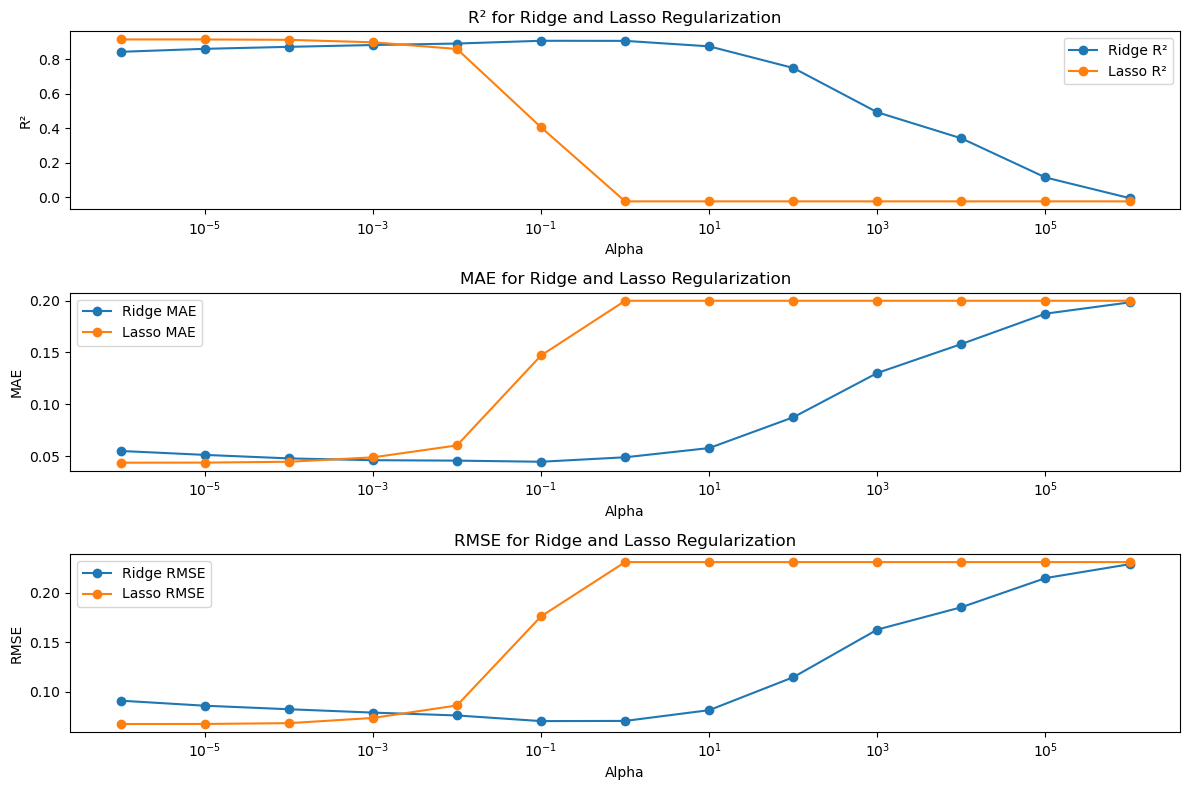

Ridge Coefficients: [-0.09885193  0.48269584  0.63304555]
Lasso Coefficients: [-0.4277201   0.82302507  0.62180382]


c:\Users\willi\anaconda3\envs\datascience2200\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.435e-01, tolerance: 5.734e-04
  model = cd_fast.enet_coordinate_descent(


In [35]:
X = df[['Length1', 'Length2', 'Length3']] 
y = df['Weight'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-6, 6, 13) 

ridge_r2s = []
lasso_r2s = []
ridge_maes = []
lasso_maes = []
ridge_rmses = []
lasso_rmses = []

for alpha in alphas:
    ridge_pipeline = Pipeline([
        ("scaler", preprocessing.StandardScaler()),  
        ("poly", preprocessing.PolynomialFeatures(degree=3)),  
        ("ridge", linear_model.Ridge(alpha=alpha)) 
    ])
  
    lasso_pipeline = Pipeline([
        ("scaler", preprocessing.StandardScaler()),  
        ("poly", preprocessing.PolynomialFeatures(degree=3)), 
        ("lasso", linear_model.Lasso(alpha=alpha))  
    ])
    
    ridge_pipeline.fit(X_train, y_train)
    y_pred_ridge = ridge_pipeline.predict(X_test)

    lasso_pipeline.fit(X_train, y_train)
    y_pred_lasso = lasso_pipeline.predict(X_test)

    ridge_r2 = metrics.r2_score(y_test, y_pred_ridge)
    ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
    
    lasso_r2 = metrics.r2_score(y_test, y_pred_lasso)
    lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
    lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
    
    ridge_r2s.append(ridge_r2)
    lasso_r2s.append(lasso_r2)
    ridge_maes.append(ridge_mae)
    lasso_maes.append(lasso_mae)
    ridge_rmses.append(ridge_rmse)
    lasso_rmses.append(lasso_rmse)

results_df = pd.DataFrame({
    "Alpha": alphas,
    "Ridge R2": ridge_r2s,
    "Lasso R2": lasso_r2s,
    "Ridge MAE": ridge_maes,
    "Lasso MAE": lasso_maes,
    "Ridge RMSE": ridge_rmses,
    "Lasso RMSE": lasso_rmses
})

print(results_df)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogx(alphas, ridge_r2s, label="Ridge R²", marker='o')
plt.semilogx(alphas, lasso_r2s, label="Lasso R²", marker='o')
plt.title('R² for Ridge and Lasso Regularization')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.legend()

plt.subplot(3, 1, 2)
plt.semilogx(alphas, ridge_maes, label="Ridge MAE", marker='o')
plt.semilogx(alphas, lasso_maes, label="Lasso MAE", marker='o')
plt.title('MAE for Ridge and Lasso Regularization')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.legend()

plt.subplot(3, 1, 3)
plt.semilogx(alphas, ridge_rmses, label="Ridge RMSE", marker='o')
plt.semilogx(alphas, lasso_rmses, label="Lasso RMSE", marker='o')
plt.title('RMSE for Ridge and Lasso Regularization')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

ridge_best_model = linear_model.Ridge(alpha=0.01)
ridge_best_model.fit(X_train, y_train)
lasso_best_model = linear_model.Lasso(alpha=0.00001)
lasso_best_model.fit(X_train, y_train)

ridge_coefficients = ridge_best_model.coef_
lasso_coefficients = lasso_best_model.coef_


print("Ridge Coefficients:", ridge_coefficients)
print("Lasso Coefficients:", lasso_coefficients)

What do you think of the final results? What are the main coefficients?

The best performance is Lasso with alpha 0.00001 and Ridge with alpha 0.01. 
Ridge does better with higher alpha values but Lasso has better predictive power with low alpha values.
Both models suffer from overfitting when alpha is too low and underfitting when alpha is too high.
Ridge Coefficients: [-0.09885193  0.48269584  0.63304555]
Lasso Coefficients: [-0.4277201   0.82302507  0.62180382]

Advanced: apply these methods to the entire fish market dataset. Do you get consistent results for the polynomial order for each species?

---

## Logistic Regression

We learned about logistic regression in lectures; now let's apply it to a real dataset. The fish market is too small for interesting logistic regression; and furthermore the fish species separate out very well in the feature space, so there is no challenge.

Let us now look at a dataset from the University of California, Irvine (UCI) Machine Learning Repository, about wine quality. This lists a number of wines - red and white - and continuous-valued chemical properties. One goal is to predict the quality of the wine based on these properties; but this is also a good opportunity to use a large dataset for logistic regression, to simply predict whether the wine is red or white.

In [37]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=186) 
wine_df = pd.DataFrame(wine.data.original)

In [38]:
# normalize the data
scaler = preprocessing.MinMaxScaler()
print(list(wine_df.keys().copy())) # there are a lot of features - if you use all of these, it's too easy!

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


In [43]:
params = ['alcohol', 'sulphates'] # pick some features - try starting with 2 and going from there

small_wine = wine_df[[*params,'color']]

scaler.fit(small_wine[params])
small_wine.loc[:, params] = scaler.transform(small_wine[params])
small_wine.head()

train, test = model_selection.train_test_split(small_wine, test_size=0.2)
print(small_wine.head())
train, test = model_selection.train_test_split(small_wine, test_size=0.2, random_state=42)
print("Train set shape:", train.shape)
print("Test set shape:", test.shape)


    alcohol  sulphates color
0  0.202899   0.191011   red
1  0.260870   0.258427   red
2  0.260870   0.241573   red
3  0.260870   0.202247   red
4  0.202899   0.191011   red
Train set shape: (5197, 3)
Test set shape: (1300, 3)


Always visualize your data:

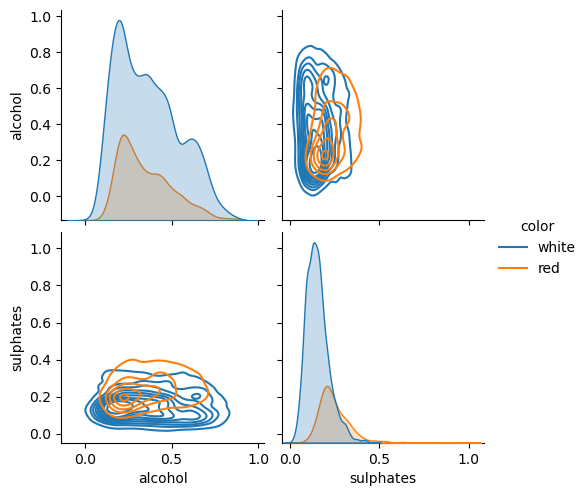

In [44]:
sns.pairplot(train, hue='color', kind='kde')

Initialize a logistic regression model:

In [47]:
from sklearn.metrics import accuracy_score

logistic = linear_model.LogisticRegression()
logistic.C = 1e5 # play with C - this may need to vary - to do this systematically, use a loop and test
X = np.array(train[params])
y = train['color'] == 'red'
C_values = [1e-5, 1e-3, 1, 10, 1e5, 1e10]
results = []
for C_value in C_values:
    logistic.C = C_value
    logistic.fit(X, y)
    X_test = np.array(test[params])
    y_test = test['color'] == 'red'
    y_pred = logistic.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((C_value, accuracy))

results_df = pd.DataFrame(results, columns=['C', 'Accuracy'])
print(results_df)

              C  Accuracy
0  1.000000e-05  0.737692
1  1.000000e-03  0.737692
2  1.000000e+00  0.777692
3  1.000000e+01  0.779231
4  1.000000e+05  0.776923
5  1.000000e+10  0.776923


There is a great way to visualize the decision boundaries of a logistic regression model; let's import some things to do that:

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay # this is for rendering decision boundaries for 2d classifiers
# there are some nice blue and red colourmaps
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

c:\Users\willi\anaconda3\envs\datascience2200\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'fill_contours'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


(0.0, 1.0)

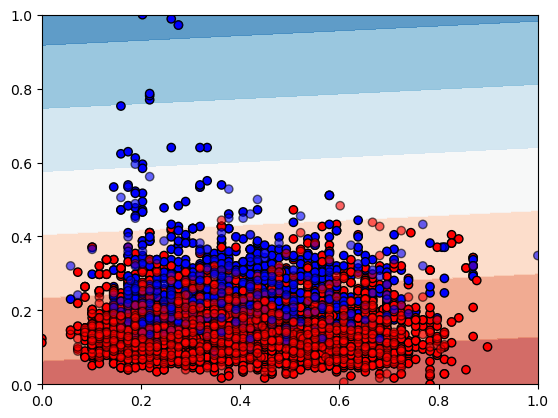

In [49]:
ax = plt.gca() # be able to access the axis so you can plot multiple things overlaid

DecisionBoundaryDisplay.from_estimator(
    logistic, X, cmap=cm, alpha=0.8, eps=0.1, fill_contours=True, ax=ax
)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=train.color=='red', cmap=cm_bright, edgecolors="k")

# Plot the testing points
X_test = np.array(test[params])
ax.scatter(X_test[:, 0], X_test[:, 1], c=test.color=='red', cmap=cm_bright, alpha=0.6, edgecolors="k")

ax.set_xlim(0,1)
ax.set_ylim(0,1)

Now we want to quantify the performance of the model. We can use the confusion matrix, which is a 2x2 matrix where the rows are the true classes and the columns are the predicted classes. The diagonal elements are the number of correct predictions, and the off-diagonal elements are the number of incorrect predictions.

<Axes: >

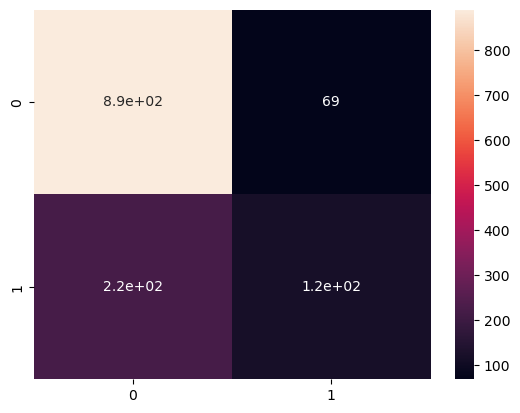

In [50]:
# confusion matrix
confusion = metrics.confusion_matrix(test.color=='red', logistic.predict(X_test))
sns.heatmap(confusion, annot=True)

How well do they separate? Do some sets of parameters overlap more or less? Try out the above calculation for different features. You may like to use for loops or other scripting to do this automatically. Store the results of the confusion matrix each time, and what percentage of data are on the diagonal vs off.

One way to quantify the performance of a classifier is to use the ROC curve. This is a plot of the true positive rate (TPR) against the false positive rate (FPR) as you vary the threshold for the classifier. Ideally, the true positive rate should be very high while keeping the false positive rate very low! The area under the curve (AUC) is a measure of the performance of the classifier: 1 is perfect (ie all true positives are found, no false positives are found), 0.5 is random (ie true positive rate = false positive rate = random).

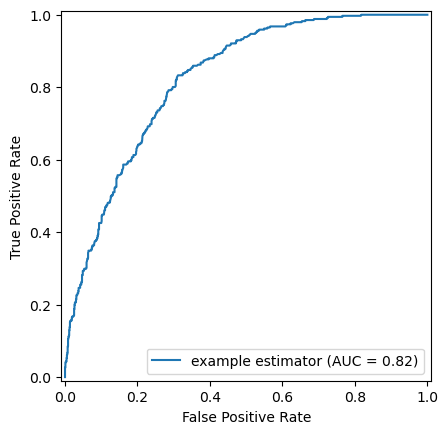

In [51]:
y = test.color=='red'
pred = logistic.predict_log_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

Set up a loop to optimize the AUC for the logistic regression, picking different features in pairs or triplets. Which features give the best AUC? What is the best AUC you can achieve?

## Advanced

In the cells below, use a pipeline to fit linear or logistic regression models to predict 

- (linear) wine quality, or 
- (logistic) where wine is top-quality (quality >5) or not, 

varying other parameter sets and regularization. Use the `quality` column to create a binary label, and use the other columns as features. You will need to consider all features, polynomials of those features, and regularization.